In [2]:
from google.colab import drive
drive.mount('/content/drive')

content = "/content/drive/My Drive/TDL/"

Mounted at /content/drive


In [3]:
! pip install torch torch-geometric -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 50.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 70.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━

In [5]:
!pip install deepwalk
!pip install node2vec


  Preparing metadata (setup.py) ... done
  Created wheel for futures: filename=futures-3.0.5-py3-none-any.whl size=14067 sha256=23641805ee6cf873042a7b76051e80f7d3c8390e3ae95063087111a3322fa4d1
  Stored in directory: /root/.cache/pip/wheels/ef/af/93/48739d464ba97d4cdc77c627d282f9794c8d276e42aaa92160
Successfully built futures


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.5 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.2.1
    Uninstalling networkx-3.2.1:
      Successfully uninstalled networkx-3.2.1


In [7]:
import networkx as nx
from node2vec import Node2Vec
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

### Given two graph datasets (graph1.edges and graph2.edges), get their statistics(number of nodes, edges, degree (mean, min, max), density and sparsity of graph, etc.) and do the analysis thoroughly

In [ ]:
def analyze_graph_1(filename, flag=False, extra_properties=False):
    G = nx.Graph()
    with open(filename, 'r') as f:
        for line in f:
            # print(line)
            try:
                u, v = map(int, line.strip().split())
                G.add_edge(u, v)
            except ValueError:
                pass

    # Basic statistics
    num_nodes = len(G.nodes)
    num_edges = len(G.edges)
    print(f"Number of nodes: {num_nodes}")
    print(f"Number of edges: {num_edges}")

    # Degree statistics
    degrees = [degree for (node, degree) in G.degree]
    mean_degree = sum(degrees) / len(degrees)
    min_degree = min(degrees)
    max_degree = max(degrees)
    print(f"Mean degree: {mean_degree}")
    print(f"Minimum degree: {min_degree}")

    # Density and sparsity
    density = nx.density(G)
    sparsity = 1 - density
    print(f"Maximum degree: {max_degree}")
    print(f"Density: {density}")
    print(f"Sparsity: {sparsity}")

    if extra_properties:
        # Average Weighted Degree
        # avg_weighted_degree = sum(w for _, _, w in G.edges.data('weight')) / len(G.edges)
        # print(f"Average Weighted Degree: {avg_weighted_degree}")

        # Transitivity
        transitivity = nx.transitivity(G)
        print(f"Transitivity: {transitivity}")

    if flag:
        # Finding cliques
        cliques_3 = [clique for clique in nx.enumerate_all_cliques(G) if len(clique) == 3]
        cliques_4 = [clique for clique in nx.enumerate_all_cliques(G) if len(clique) == 4]

        # Node centrality
        node_centrality = nx.degree_centrality(G)

        # Clustering coefficients
        clustering_coefficients = nx.clustering(G)
        print(f"3-cliques: {len(cliques_3)}")
        print(f"4-cliques: {len(cliques_4)}")
        print(f"Node centrality: {node_centrality}")
        print(f"Clustering coefficients: {clustering_coefficients}")

In [ ]:
def analyze_graph_2(filename, flag=False, extra_properties=False):
    G = nx.Graph()
    with open(filename, 'r') as f:
        for line in f:
            components = line.strip().split(',')
            if len(components) == 2:
                u, v = map(int, line.strip().split())
                G.add_edge(u, v)
            elif len(components) == 3:
                u, v, w = map(int, components[:3])
                G.add_edge(u, v, weight=w)
            else:
                pass

    # Basic statistics
    num_nodes = len(G.nodes)
    num_edges = len(G.edges)
    print(f"Number of nodes: {num_nodes}")
    print(f"Number of edges: {num_edges}")

    # Degree statistics
    degrees = [degree for (node, degree) in G.degree]
    mean_degree = sum(degrees) / len(degrees)
    min_degree = min(degrees)
    max_degree = max(degrees)
    print(f"Mean degree: {mean_degree}")
    print(f"Minimum degree: {min_degree}")
    print(f"Maximum degree: {max_degree}")

    # Density and sparsity
    density = nx.density(G)
    sparsity = 1 - density
    print(f"Density: {density}")
    print(f"Sparsity: {sparsity}")

    if extra_properties:
        # Average Weighted Degree
        avg_weighted_degree = sum(w for _, _, w in G.edges.data('weight')) / len(G.edges)
        print(f"Average Weighted Degree: {avg_weighted_degree}")

        # Transitivity
        transitivity = nx.transitivity(G)
        print(f"Transitivity: {transitivity}")

    if flag:
        # Finding cliques
        cliques_3 = [clique for clique in nx.enumerate_all_cliques(G) if len(clique) == 3]
        cliques_4 = [clique for clique in nx.enumerate_all_cliques(G) if len(clique) == 4]

        # Node centrality
        node_centrality = nx.degree_centrality(G)

        # Clustering coefficients
        clustering_coefficients = nx.clustering(G)
        print(f"3-cliques: {len(cliques_3)}")
        print(f"4-cliques: {len(cliques_4)}")
        print(f"Node centrality: {node_centrality}")
        print(f"Clustering coefficients: {clustering_coefficients}")

In [ ]:
print("Graph 1:")
analyze_graph_1(content + 'graph1.edges')

Graph 1:
Number of nodes: 1174
Number of edges: 1417
Mean degree: 2.41396933560477
Minimum degree: 1
Maximum degree: 10
Density: 0.002057944872638338
Sparsity: 0.9979420551273617


In [ ]:
print("\nGraph 2:")
analyze_graph_2(content + 'graph2.edges')


Graph 2:
Number of nodes: 3212
Number of edges: 3423
Mean degree: 2.131382316313823
Minimum degree: 1
Maximum degree: 267
Density: 0.0006637752464384376
Sparsity: 0.9993362247535615


### Perform analysis on properties like finding out cliques (3-clique, 4-clique), node centrality, and clustering coefficients

In [ ]:
print("Graph 1:")
analyze_graph_1(content + 'graph1.edges', flag=True)

Graph 1:
Number of nodes: 1174
Number of edges: 1417
Mean degree: 2.41396933560477
Minimum degree: 1
Maximum degree: 10
Density: 0.002057944872638338
Sparsity: 0.9979420551273617
3-cliques: 32
4-cliques: 0
Node centrality: {1: 0.0008525149190110827, 2: 0.002557544757033248, 3: 0.0017050298380221654, 17: 0.002557544757033248, 4: 0.002557544757033248, 5: 0.0008525149190110827, 855: 0.0017050298380221654, 6: 0.0017050298380221654, 7: 0.0068201193520886615, 880: 0.0017050298380221654, 8: 0.004262574595055414, 22: 0.002557544757033248, 23: 0.005115089514066496, 411: 0.004262574595055414, 453: 0.004262574595055414, 454: 0.004262574595055414, 889: 0.0017050298380221654, 9: 0.004262574595055414, 479: 0.0034100596760443308, 480: 0.0017050298380221654, 561: 0.004262574595055414, 10: 0.0034100596760443308, 537: 0.0034100596760443308, 1074: 0.002557544757033248, 11: 0.002557544757033248, 536: 0.002557544757033248, 12: 0.004262574595055414, 560: 0.0017050298380221654, 13: 0.0034100596760443308, 27:

In [ ]:
print("\nGraph 2:")
analyze_graph_2(content + 'graph2.edges', flag=True)


Graph 2:
Number of nodes: 3212
Number of edges: 3423
Mean degree: 2.131382316313823
Minimum degree: 1
Maximum degree: 267
Density: 0.0006637752464384376
Sparsity: 0.9993362247535615
3-cliques: 14
4-cliques: 0
Node centrality: {967: 0.006540018685767674, 717: 0.0003114294612270321, 429: 0.0006228589224540642, 679: 0.0003114294612270321, 2404: 0.0003114294612270321, 367: 0.0003114294612270321, 2454: 0.0003114294612270321, 1885: 0.0006228589224540642, 391: 0.0003114294612270321, 1551: 0.0006228589224540642, 81: 0.0003114294612270321, 166: 0.0006228589224540642, 2274: 0.0003114294612270321, 1162: 0.0003114294612270321, 124: 0.0003114294612270321, 250: 0.0003114294612270321, 2829: 0.0003114294612270321, 1983: 0.0003114294612270321, 1554: 0.0003114294612270321, 2009: 0.0003114294612270321, 1013: 0.0009342883836810964, 1489: 0.0003114294612270321, 2553: 0.004048582995951417, 1203: 0.0003114294612270321, 2233: 0.0003114294612270321, 1152: 0.0006228589224540642, 3062: 0.0006228589224540642, 84

### Perform more analysis by creating 1-2 new properties of your own.

Added avg_weighted_degree, transitivity

In [ ]:
print("Graph 1:")
analyze_graph_1(content + 'graph1.edges', flag=True, extra_properties=True)

Graph 1:
Number of nodes: 1174
Number of edges: 1417
Mean degree: 2.41396933560477
Minimum degree: 1
Maximum degree: 10
Density: 0.002057944872638338
Sparsity: 0.9979420551273617
Transitivity: 0.0338863395693611
3-cliques: 32
4-cliques: 0
Node centrality: {1: 0.0008525149190110827, 2: 0.002557544757033248, 3: 0.0017050298380221654, 17: 0.002557544757033248, 4: 0.002557544757033248, 5: 0.0008525149190110827, 855: 0.0017050298380221654, 6: 0.0017050298380221654, 7: 0.0068201193520886615, 880: 0.0017050298380221654, 8: 0.004262574595055414, 22: 0.002557544757033248, 23: 0.005115089514066496, 411: 0.004262574595055414, 453: 0.004262574595055414, 454: 0.004262574595055414, 889: 0.0017050298380221654, 9: 0.004262574595055414, 479: 0.0034100596760443308, 480: 0.0017050298380221654, 561: 0.004262574595055414, 10: 0.0034100596760443308, 537: 0.0034100596760443308, 1074: 0.002557544757033248, 11: 0.002557544757033248, 536: 0.002557544757033248, 12: 0.004262574595055414, 560: 0.001705029838022165

In [ ]:
print("Graph 2:")
analyze_graph_2(content + 'graph2.edges', flag=True, extra_properties=True)

Graph 2:
Number of nodes: 3212
Number of edges: 3423
Mean degree: 2.131382316313823
Minimum degree: 1
Maximum degree: 267
Density: 0.0006637752464384376
Sparsity: 0.9993362247535615
Average Weighted Degree: 1347457933.101373
Transitivity: 0.00030805565538840685
3-cliques: 14
4-cliques: 0
Node centrality: {967: 0.006540018685767674, 717: 0.0003114294612270321, 429: 0.0006228589224540642, 679: 0.0003114294612270321, 2404: 0.0003114294612270321, 367: 0.0003114294612270321, 2454: 0.0003114294612270321, 1885: 0.0006228589224540642, 391: 0.0003114294612270321, 1551: 0.0006228589224540642, 81: 0.0003114294612270321, 166: 0.0006228589224540642, 2274: 0.0003114294612270321, 1162: 0.0003114294612270321, 124: 0.0003114294612270321, 250: 0.0003114294612270321, 2829: 0.0003114294612270321, 1983: 0.0003114294612270321, 1554: 0.0003114294612270321, 2009: 0.0003114294612270321, 1013: 0.0009342883836810964, 1489: 0.0003114294612270321, 2553: 0.004048582995951417, 1203: 0.0003114294612270321, 2233: 0.00

In [ ]:
import torch

!pip uninstall torch-scatter torch-sparse torch-geometric torch-cluster  --y
!pip install torch-scatter -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install git+https://github.com/pyg-team/pytorch_geometric.git

!pip install torch-cluster
!pip install pyg-library -q

!pip install torch_geometric
!pip install pyg_lib torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-2.1.0+cpu.html

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.nn import Node2Vec
from torch_geometric.utils import negative_sampling, to_undirected
import networkx as nx
import numpy as np
from torch_geometric.data import Data
from torch_geometric.utils import from_networkx

In [ ]:


graph1 = nx.read_edgelist(content + "graph1.edges", data=False)
print("graph1 nodes:", graph1.nodes)
print("graph1 edges:", graph1.edges)

# Convert the graphs to PyTorch Geometric Data objects
data1 = from_networkx(graph1)

# Convert the graphs to undirected
data1.edge_index = to_undirected(data1.edge_index)

# Define the link prediction model
class LinkPredictionModel(nn.Module):
    def __init__(self, emb_size):
        super(LinkPredictionModel, self).__init__()
        self.embedding = nn.Embedding(data1.num_nodes, emb_size)

    def forward(self, x):
        return self.embedding(x)

# Example usage
emb_size = 128
model = LinkPredictionModel(emb_size)
print(model)


graph1 nodes: ['%', 'sym', '1417', '1', '2', '3', '17', '4', '5', '855', '6', '7', '880', '8', '22', '23', '411', '453', '454', '889', '9', '479', '480', '561', '10', '537', '1074', '11', '536', '12', '560', '13', '27', '30', '559', '14', '596', '1138', '34', '15', '16', '18', '19', '823', '20', '388', '389', '627', '21', '409', '885', '24', '538', '1078', '1109', '25', '1110', '26', '28', '29', '31', '32', '33', '1159', '35', '36', '392', '37', '631', '38', '628', '863', '1011', '39', '40', '412', '413', '875', '876', '881', '41', '42', '43', '882', '44', '50', '51', '455', '45', '46', '888', '47', '485', '1036', '48', '73', '486', '890', '49', '74', '629', '52', '901', '53', '54', '55', '540', '56', '57', '541', '912', '86', '562', '58', '59', '60', '61', '62', '63', '1144', '64', '65', '394', '842', '66', '393', '1012', '67', '68', '69', '669', '70', '414', '415', '630', '633', '71', '417', '456', '670', '879', '72', '671', '1037', '75', '76', '77', '78', '677', '79', '80', '81', '8

Not able to implement

In [1]:
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# edge_index = from_networkx(graph1).edge_index

# # Train the Node2Vec model
# model = Node2Vec(graph1, embedding_dim=128, walk_length=80, context_size=10, walks_per_node=10)
# model.train()

# # Generate node embeddings
# embeddings = model.get_embeddings()

# # Convert embeddings to PyTorch tensor and move to device
# embeddings_tensor = torch.tensor(embeddings).to(device)


In [ ]:
class LinkPredictionModel(nn.Module):
    def __init__(self, emb_size):
        super(LinkPredictionModel, self).__init__()
        self.embedding = nn.Embedding(len(graph1.nodes), emb_size)
        self.fc = nn.Linear(emb_size * 2, 1)

    def forward(self, x_i, x_j):
        emb_i = self.embedding(x_i)
        emb_j = self.embedding(x_j)
        x = torch.cat((emb_i, emb_j), dim=1)
        x = self.fc(x)
        return x

# Initialize the link prediction model
link_prediction_model = LinkPredictionModel(128).to(device)

In [ ]:
# Define the loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(link_prediction_model.parameters(), lr=0.01)


In [ ]:

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    optimizer.zero_grad()
    # Assume edge_index contains the edge connections in PyTorch Geometric format
    pos_edge_index = edge_index
    neg_edge_index = negative_sampling(pos_edge_index, num_nodes=len(graph1.nodes))

    # Get node embeddings for the positive and negative edges
    pos_src, pos_dst = pos_edge_index
    neg_src, neg_dst = neg_edge_index
    pos_src_emb = embeddings_tensor[pos_src]
    pos_dst_emb = embeddings_tensor[pos_dst]
    neg_src_emb = embeddings_tensor[neg_src]
    neg_dst_emb = embeddings_tensor[neg_dst]

    # Predict links and calculate loss
    pos_out = link_prediction_model(pos_src, pos_dst)
    neg_out = link_prediction_model(neg_src, neg_dst)
    pos_label = torch.ones(pos_out.size(0), device=device)
    neg_label = torch.zeros(neg_out.size(0), device=device)
    loss = criterion(torch.cat([pos_out, neg_out]), torch.cat([pos_label, neg_label]))

    # Backward pass and optimization
    loss.backward()
    optimizer.step()

In [ ]:
# # Evaluate the model using link prediction metrics
# def evaluate_link_prediction(model, graph):
#     edges = np.array(list(graph.edges))
#     neg_edges = negative_sampling(edges, num_neg_samples=len(edges))
#     pos_rw = model(torch.tensor(edges).to(device)).mean(1)
#     neg_rw = model(torch.tensor(neg_edges).to(device)).mean(1)
#     pos_score = torch.sigmoid((pos_rw[:, 0] * pos_rw[:, 1]).sum())
#     neg_score = torch.sigmoid((neg_rw[:, 0] * neg_rw[:, 1]).sum())
#     return pos_score.item(), neg_score.item()


# Evaluate link prediction
def evaluate_link_prediction(model, embeddings_tensor, edge_index):
    with torch.no_grad():
        src, dst = edge_index
        src_emb = embeddings_tensor[src]
        dst_emb = embeddings_tensor[dst]
        link_probs = torch.sigmoid(torch.sum(src_emb * dst_emb, dim=1))
        return link_probs

# Assuming edge_index is the edge connections in PyTorch Geometric format
edge_index = edge_index.cpu().numpy()
link_probs = evaluate_link_prediction(link_prediction_model, embeddings_tensor.cpu(), edge_index)

In [ ]:

pos_score, neg_score = evaluate_link_prediction(model, graph1)
print(f'Link Prediction Scores for graph1 - Positive: {pos_score}, Negative: {neg_score}')


In [ ]:
import networkx as nx

edge_list_path = content + "graph1.edges"

# Load the graph from the edge list file
# G = nx.read_edgelist(edge_list_path)
G = nx.read_edgelist(content + "graph1.edges", data=False)
# Print the nodes and edges of the loaded graph
print("Nodes:", G.nodes)
print("Edges:", G.edges)



Nodes: ['%', 'sym', '1417', '1', '2', '3', '17', '4', '5', '855', '6', '7', '880', '8', '22', '23', '411', '453', '454', '889', '9', '479', '480', '561', '10', '537', '1074', '11', '536', '12', '560', '13', '27', '30', '559', '14', '596', '1138', '34', '15', '16', '18', '19', '823', '20', '388', '389', '627', '21', '409', '885', '24', '538', '1078', '1109', '25', '1110', '26', '28', '29', '31', '32', '33', '1159', '35', '36', '392', '37', '631', '38', '628', '863', '1011', '39', '40', '412', '413', '875', '876', '881', '41', '42', '43', '882', '44', '50', '51', '455', '45', '46', '888', '47', '485', '1036', '48', '73', '486', '890', '49', '74', '629', '52', '901', '53', '54', '55', '540', '56', '57', '541', '912', '86', '562', '58', '59', '60', '61', '62', '63', '1144', '64', '65', '394', '842', '66', '393', '1012', '67', '68', '69', '669', '70', '414', '415', '630', '633', '71', '417', '456', '670', '879', '72', '671', '1037', '75', '76', '77', '78', '677', '79', '80', '81', '82', '54

In [ ]:
!pip install node2vec -q

SIMILARITY WISE

In [ ]:


# Load the graph dataset
graph1 = nx.read_edgelist(content + "graph1.edges", data=False)

# Convert the graph to an undirected graph
graph1 = graph1.to_undirected()

# Generate random walks using Node2Vec
node2vec = Node2Vec(graph1, walk_length=10, num_walks=5, workers=4)

# Use the learned embeddings for link prediction
# Get the node embeddings
model1 = node2vec.fit(window=5, min_count=1, batch_words=4, vector_size=128)
node_embeddings1 = model1.wv

# Calculate cosine similarity between embeddings of pairs of nodes
# For each pair of nodes, calculate cosine similarity and consider it as a potential link
potential_links1 = []
for edge in nx.non_edges(graph1):
    node1, node2 = edge
    if str(node1) in node_embeddings1 and str(node2) in node_embeddings1:
        embedding1 = node_embeddings1[str(node1)]
        embedding2 = node_embeddings1[str(node2)]
        similarity = cosine_similarity([embedding1], [embedding2])[0][0]
        potential_links1.append({"node1": node1, "node2": node2, "similarity": similarity})

# Sort potential links by similarity
potential_links1 = pd.DataFrame(potential_links1).sort_values(by="similarity", ascending=False)

# Print the top 10 potential links for graph 1
print("Graph 1:")
print(potential_links1.head(10))


Computing transition probabilities:   0%|          | 0/1177 [00:00<?, ?it/s]

Graph 1:
       node1 node2  similarity
296614   648   646    0.999524
27972    820   812    0.999400
158383    60    58    0.999398
605448   sym  1417    0.999361
140551    63    61    0.999316
184595    61  1144    0.999304
144110   124  1149    0.999271
163534   927   925    0.999220
474544   938   940    0.999181
140249    63  1144    0.999077


In [ ]:
len(potential_links1)

690657

In [ ]:
len(potential_links1[potential_links1['similarity'] > 0.9])

2562

In [ ]:
print("Shape of node embeddings:", node_embeddings1.vectors.shape)

Shape of node embeddings: (1177, 128)


In [ ]:
potential_links1

,node1,node2,similarity
624925,1144,63,0.999588
363468,820,812,0.999522
122016,1417,sym,0.999403
217404,61,1144,0.999382
106517,655,653,0.999344
...,...,...,...
161079,792,274,0.148531
281121,354,735,0.145941
85057,450,735,0.143155
454375,353,236,0.139419


In [35]:
import networkx as nx

graph1 = nx.read_edgelist(content + "graph1.edges", data=False)

graph2_path = content + "graph2.edges"
graph2 = nx.read_edgelist(graph2_path)


USING BITH DEEPWALK AND NODE2Vec

In [36]:
from gensim.models import Word2Vec
from gensim.models.callbacks import CallbackAny2Vec
import random

class LossLogger(CallbackAny2Vec):
    def __init__(self):
        self.epoch = 0
        self.losses = []

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        if self.epoch == 0:
            self.losses.append(loss)
        else:
            self.losses.append(loss - self.loss_previous_step)
        self.epoch += 1
        self.loss_previous_step = loss

# Convert graph to a list of walks for DeepWalk
walks = []
for node in graph1.nodes():
    for _ in range(200):  # number of walks per node
        walk = [node]
        for _ in range(30):  # walk length
            neighbors = list(graph1.neighbors(walk[-1]))
            if not neighbors:
                break
            walk.append(random.choice(neighbors))
        walks.append(list(map(str, walk)))

# Train DeepWalk model
loss_logger = LossLogger()
model = Word2Vec(walks, vector_size=64, window=10, min_count=0, sg=1, workers=4, epochs=5, callbacks=[loss_logger])

# Get node embeddings
node_embeddings = {node: model.wv[str(node)] for node in graph1.nodes()}


In [37]:
len(node_embeddings)

1177

In [38]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
# print(np.array(node_embeddings).shape)
# cosine similarity between node embeddings
deepwalk_similarity_matrix = cosine_similarity(list(node_embeddings.values()))

# cosine similarity between nodes 0 and 1
print("DeepWalk similarity between nodes 0 and 1:", deepwalk_similarity_matrix[0][1])


DeepWalk similarity between nodes 0 and 1: 0.99745554


In [39]:
# from node2vec import Node2Vec
# from sklearn.metrics.pairwise import cosine_similarity

# # Initialize Node2Vec model
# node2vec = Node2Vec(graph2, dimensions=64, walk_length=30, num_walks=200, workers=4, p=1, q=0.5)

# # Train Node2Vec model
# model = node2vec.fit()

# # Get node embeddings
# node_embeddings = {node: model.wv[str(node)] for node in graph2.nodes()}

# # Calculate cosine similarity between node embeddings
# node2vec_similarity_matrix = cosine_similarity(list(node_embeddings.values()))

# # Example: Print the cosine similarity between nodes 0 and 1
# print("Node2Vec similarity between nodes 0 and 1:", node2vec_similarity_matrix[0][1])


In [40]:
# from deepwalk import DeepWalk

# from sklearn.metrics.pairwise import cosine_similarity

# # DeepWalk
# deepwalk = DeepWalk(graph1, walk_length=30, num_walks=200, workers=4)
# deepwalk_embeddings = deepwalk.fit()

# # Node2Vec
# node2vec = Node2Vec(graph2, dimensions=64, walk_length=30, num_walks=200, workers=4, p=1, q=0.5)
# node2vec_embeddings = node2vec.fit(window=10)

# # Calculate cosine similarity between node embeddings
# # deepwalk_similarity_matrix = cosine_similarity(deepwalk_embeddings)
# node2vec_similarity_matrix = cosine_similarity(node_embeddings1)

# # Example: Print the cosine similarity between nodes 0 and 1 for both algorithms
# print("DeepWalk similarity between nodes 0 and 1:", deepwalk_similarity_matrix[0][1])
# print("Node2Vec similarity between nodes 0 and 1:", node2vec_similarity_matrix[0][1])


Part 5

In [20]:
import math, random
import numpy as np

def get_predictions(graph, model):
    edge_set = set(graph.edges)
    link_preds = []

    for u in range(1, len(graph.nodes)+1):
        for v in range(u+1, len(graph.nodes)+1):
            if (u, v) not in edge_set and (v, u) not in edge_set:
                u_emb = model.wv[str(u)]
                v_emb = model.wv[str(v)]
                link_preds.append([np.dot(u_emb, v_emb), (u, v)])

    link_preds.sort(key=lambda x: x[0], reverse=True)

    return link_preds

In [21]:
def get_walks(adjacency_list, number_of_walks = 5000, walk_length = 20, p = 0):
    walks = []
    walks_per_node = math.ceil(number_of_walks / len(adjacency_list))

    for node in range(len(adjacency_list)):
        if len(adjacency_list[node]) == 0:
            continue
        for _ in range(walks_per_node):
            walk = []
            current_node = node
            for _ in range(walk_length):
                toss = random.randint(1,1000)/1000
                if toss > p:
                    walk.append(current_node)
                else:
                    random_neighbor = random.choice(adjacency_list[current_node])
                    walk.append(random_neighbor)
                    current_node = random_neighbor
            walks.append(walk)

    random.shuffle(walks)
    return walks[:number_of_walks]

In [22]:
def get_adjacency(edge_list):
    node_count = max(max(edge[0], edge[1]) for edge in edge_list)
    print("Number of Nodes in Graph:", node_count)

    adjacency_list = [[] for _ in range(node_count + 1)]

    for edge in edge_list:
        adjacency_list[edge[0]].append(edge[1])
        adjacency_list[edge[1]].append(edge[0])

    return adjacency_list


In [24]:
graph1 = []
with open(content + "graph1.edges", 'r') as file:
    for line in file:
        edge = line.strip().split()
        if len(edge) == 2:
            graph1.append((int(edge[0]), int(edge[1])))

adj1 = get_adjacency(graph1)
walks1 = get_walks(adj1, 10000, 30)
model1 = Word2Vec(sentences=walks1, window=4, vector_size=128)
predictions1 = get_predictions(graph1, model1)
print(predictions1[:5])

Number of Nodes in Graph: 1174
[[28.103935, (222, 546)], [28.103935, (546, 222)], [27.323864, (236, 964)], [27.323864, (964, 236)], [27.075077, (222, 762)]]


In [27]:
from gensim.models.word2vec import Word2Vec
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


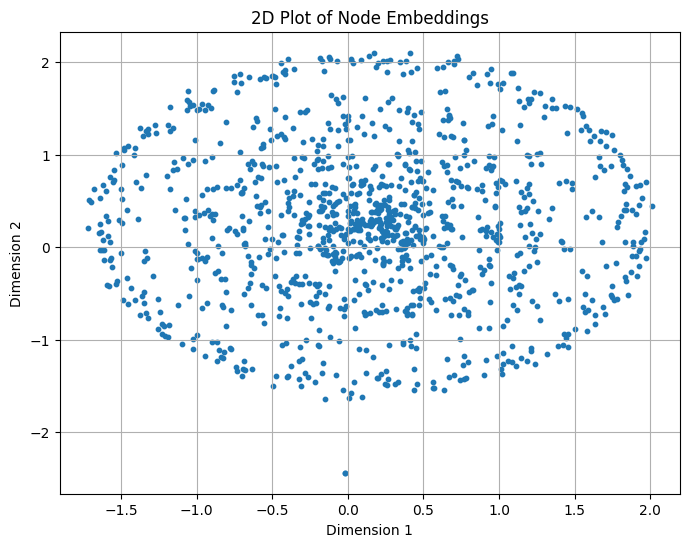

In [28]:
vectors = np.array([model1.wv[i] for i in range(len(adj1))])
tsne = TSNE(n_components=2)
reduced_embeddings = tsne.fit_transform(vectors)
plt.figure(figsize=(8, 6))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], s=10)
plt.title('2D Plot of Node Embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.show()

In [29]:
walks_biased = get_walks(adj1, 10000, 30, 0.2)
model1 = Word2Vec(sentences=walks_biased, window=4, vector_size=128)
predictions1 = get_predictions(graph1, model1)
print(predictions1[:10])

[[44.828526, (206, 208)], [44.828526, (208, 206)], [43.26377, (181, 236)], [43.26377, (236, 181)], [43.19919, (267, 269)], [43.19919, (269, 267)], [42.80905, (39, 862)], [42.80905, (862, 39)], [41.96777, (265, 550)], [41.96777, (550, 265)]]


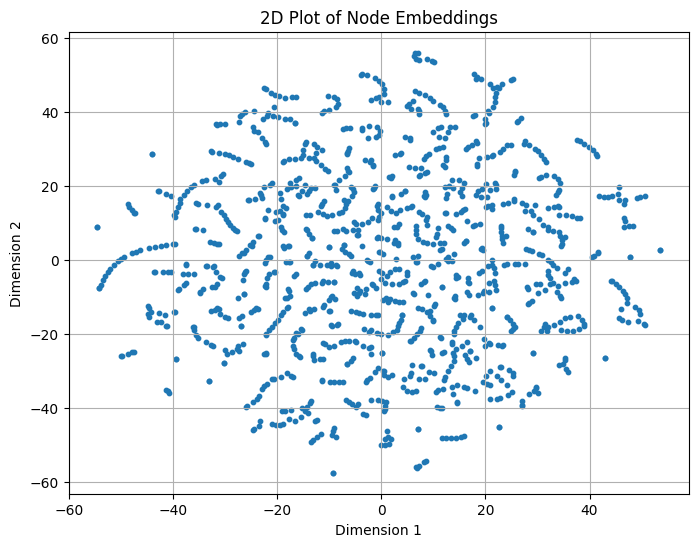

In [30]:
vectors = np.array([model1.wv[i] for i in range(len(adj1))])
tsne = TSNE(n_components=2)
reduced_embeddings = tsne.fit_transform(vectors)
plt.figure(figsize=(8, 6))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], s=10)
plt.title('2D Plot of Node Embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.show()

In [31]:
graph2 = []
with open(content + "graph2.edges", 'r') as file:
    for line in file:
        edge = line.strip().split(",")
        graph2.append((int(edge[0]), int(edge[1])))

adj2 = get_adjacency(graph2)
walks2 = get_walks(adj2, 10000, 30)
model2 = Word2Vec(sentences=walks2, window=4, vector_size=128)
predictions2 = get_predictions(graph2, model2)
print(predictions2[:10])

Number of Nodes in Graph: 3212
[[33.969032, (497, 684)], [33.969032, (684, 497)], [32.926437, (567, 940)], [32.926437, (940, 567)], [26.208233, (323, 478)], [26.208233, (478, 323)], [25.983604, (210, 323)], [25.983604, (323, 210)], [25.74982, (323, 725)], [25.74982, (725, 323)]]


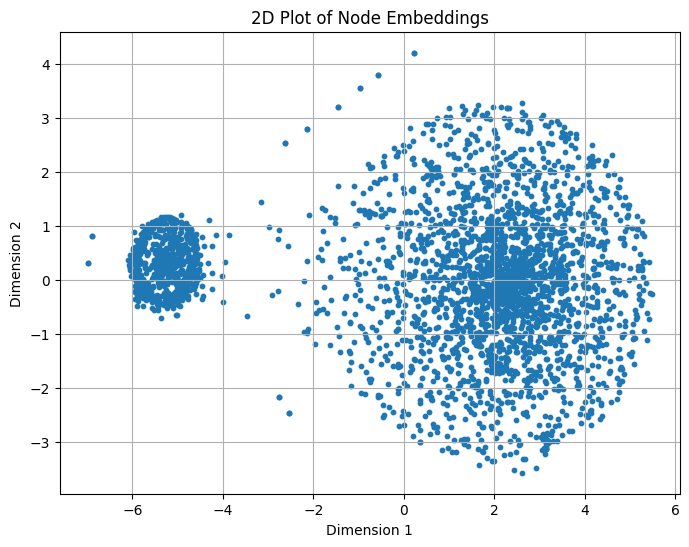

In [32]:
vectors = np.array([model2.wv[i] for i in range(len(adj2))])
tsne = TSNE(n_components=2)
reduced_embeddings = tsne.fit_transform(vectors)
plt.figure(figsize=(8, 6))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], s=10)
plt.title('2D Plot of Node Embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.show()

In [33]:
walks_biased = get_walks(adj2, 10000, 30, 0.2)
model2 = Word2Vec(sentences=walks_biased, window=4, vector_size=128)
predictions2 = get_predictions(graph2, model2)
print(predictions2[:10])

[[84.29126, (667, 1019)], [84.29126, (1019, 667)], [83.54755, (740, 1019)], [83.54755, (1019, 740)], [77.89248, (433, 504)], [77.89248, (504, 433)], [75.88357, (1019, 1088)], [75.88357, (1088, 1019)], [75.834625, (827, 1019)], [75.834625, (1019, 827)]]


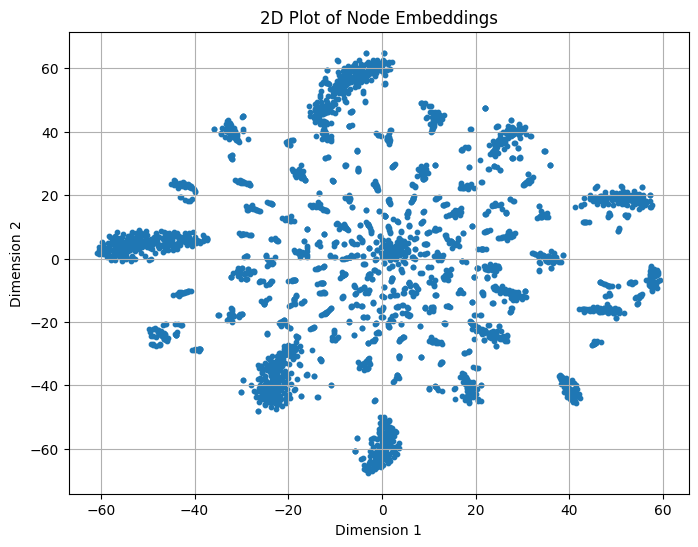

In [34]:
vectors = []
for i in range(len(adj2)):
  try:
    vectors.append(model2.wv[i])
  except:
    pass
vectors = np.array(vectors)
tsne = TSNE(n_components=2)
reduced_embeddings = tsne.fit_transform(vectors)
plt.figure(figsize=(8, 6))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], s=10)
plt.title('2D Plot of Node Embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.show()

## We need to understand their key differences and how they operate in these contexts.

### DeepWalk:

Method: DeepWalk is based on the Skip-gram model in natural language processing, where it learns node embeddings by treating random walks in the graph as sentences and nodes as words. It uses these random walks to learn representations that capture the local neighborhood structure of nodes.
Strengths: DeepWalk works well for capturing the local topology of nodes, making it suitable for tasks where nodes with similar local neighborhoods are likely to be connected.
Weaknesses: DeepWalk may struggle with capturing higher-order structural information and global graph properties, as it focuses primarily on local neighborhoods. This limitation can lead to suboptimal performance in tasks that require understanding broader graph structures.
### Node2Vec:

Method: Node2Vec extends DeepWalk by introducing biased random walks that balance between exploring new nodes (breadth-first search) and revisiting nodes (depth-first search). This approach allows Node2Vec to capture both local and global graph structures.
Strengths: Node2Vec's ability to balance exploration and exploitation during random walks enables it to capture not only local but also higher-order structural information. This makes it more suitable for tasks that require understanding both local and global graph properties.
Weaknesses: Node2Vec's performance can be sensitive to the choice of hyperparameters, such as the walk length and the probabilities for the breadth-first and depth-first search strategies. Suboptimal hyperparameters can lead to less effective representation learning.


## Analysis for Link Prediction:

### DeepWalk:

Strength for Link Prediction: DeepWalk's focus on local neighborhood structure can be beneficial for link prediction tasks where node connectivity is influenced primarily by immediate neighbors. It can effectively capture the similarity between nodes based on their local connectivity patterns.
Weakness for Link Prediction: DeepWalk may struggle with predicting links that are influenced by higher-order structural patterns or global graph properties. It may not capture well the relationships between nodes that are not directly connected but have similar structural roles in the graph.

### Node2Vec:

Strength for Link Prediction: Node2Vec's ability to capture both local and global graph structures makes it more suitable for link prediction tasks that require understanding both local and higher-order connectivity patterns. It can effectively model the structural roles of nodes and their relationships in the graph.
Weakness for Link Prediction: Node2Vec's performance may be affected by the choice of hyperparameters, and finding the optimal balance between exploration and exploitation can be challenging. Suboptimal hyperparameters can lead to less effective representation learning for link prediction.


### Conclusion:

For link prediction in undirected and unweighted graphs, Node2Vec is likely to give better representations than DeepWalk. Node2Vec's ability to capture both local and global graph structures allows it to model the complex relationships between nodes more effectively, making it more suitable for tasks that require understanding both local and higher-order connectivity patterns. However, the performance of Node2Vec can be sensitive to hyperparameter tuning, requiring careful selection to achieve optimal results.